# ChatGPT 모델 파인튜닝

심리 상담 ChatGPT 만들기

In [1]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="../.env")

True

In [2]:
import json
import pandas as pd
import urllib.request
from openai import OpenAI

In [3]:
client = OpenAI()

##### 학습 데이터 다운로드

In [4]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/MrBananaHuman/CounselGPT/main/total_kor_multiturn_counsel_bot.jsonl', 'total_kor_multiturn_counsel_bot.jsonl')

with open('total_kor_multiturn_counsel_bot.jsonl', 'r', encoding='utf-8') as file:
    original_jsonl_data = [json.loads(line) for line in file]
print('데이터의 개수:', len(original_jsonl_data))

데이터의 개수: 8731


In [5]:
# 앞에 200개만 추출
original_jsonl_data = original_jsonl_data[:200]
print('데이터의 개수:', len(original_jsonl_data))

데이터의 개수: 200


In [6]:
print(original_jsonl_data[0])

[{'speaker': '상담사', 'utterance': '안녕하세요. 상담사입니다. 무엇이 불편하시나요?'}, {'speaker': '내담자', 'utterance': '내가 약간 중2병 같은 걸 증상을 보이고 있어요.'}, {'speaker': '상담사', 'utterance': '중2병 증상이라니, 어떤 증상이신 건가요?'}, {'speaker': '내담자', 'utterance': '그러니까 공부하기 싫어하고, 공격적이고, 좀 무례하게 말하고 싶은 게 많아져서 그런 거예요.'}, {'speaker': '상담사', 'utterance': '그런 증상이 있으니까 힘드시겠죠. 중2병 같은 것이라고 생각하시는 이유는 무엇인가요?'}, {'speaker': '내담자', 'utterance': '막 공부 안하고 이것저것 들먹이고 하고 싶은 게 너무 많아서 그런 거 같아요.'}, {'speaker': '상담사', 'utterance': '그런 것도 어쩔 수 없이 찾아오는 시기가 있으니까 무리하지 않도록 해야겠죠. 대학교를 가면서 나아질 것 같았는데, 오히려 더 심해진 것 같다고 하셨죠. 그 원인이 무엇인가요?'}, {'speaker': '내담자', 'utterance': '그걸 제가 잘 몰라서 그런 것 같아요. 그냥 더 심해졌다고 느꼈어요.'}, {'speaker': '상담사', 'utterance': '대학교 생활이 신나고 재밌으신 건 어떤 점이 있나요?'}, {'speaker': '내담자', 'utterance': '학과가 정말 좋아서 즐겁게 수업을 듣고 있어요. 학우들도 좋고 괜찮은 친구들도 많이 만나서 그런 것 같아요.'}, {'speaker': '상담사', 'utterance': '즐거운 일도 많이 있으면서 고민거리도 있는 것 같군요. 가사나 소설을 쓰시면서 마음을 풀기도 하신다고 하셨는데, 언제부터 그 습관이 생겨난 건가요?'}, {'speaker': '내담자', 'utterance': '좋은 질문이에요. 좀 자세히 말씀드릴게요. 학교에서 어려운 일이 

##### ChatGPT API에 사용할 수 있는 형식으로 변경

In [7]:
speaker_dict = {'내담자': 'user', '상담사': 'assistant'}

def transform_to_new_format(original_data, speaker_dict):
    transformed_data = []
    for conversation in original_data:
        current_conversation = {"messages": [{"role": "system", "content": "당신은 정서적으로 심리가 불안한 사용자를 위로해주는 심리 상담 챗봇입니다. 성심성의껏 상담해주세요"}]}
        for item in conversation:
            current_conversation["messages"].append({
                "role": speaker_dict[item["speaker"]],
                "content": item["utterance"]
            })
        # 각각의 데이터의 마지막 대화는 반드시 "role"이 "assistant"인 대화여야만 한다. 이는 OpenAI 에서 정한 데이터의 규칙이다.
        if current_conversation['messages'][-1]['role'] == 'user':
            current_conversation['messages'] = current_conversation['messages'][:-1]
        transformed_data.append(current_conversation)

    return transformed_data

result = transform_to_new_format(original_jsonl_data, speaker_dict)
print('데이터의 개수:', len(result))

데이터의 개수: 200


In [8]:
print(result[0])

{'messages': [{'role': 'system', 'content': '당신은 정서적으로 심리가 불안한 사용자를 위로해주는 심리 상담 챗봇입니다. 성심성의껏 상담해주세요'}, {'role': 'assistant', 'content': '안녕하세요. 상담사입니다. 무엇이 불편하시나요?'}, {'role': 'user', 'content': '내가 약간 중2병 같은 걸 증상을 보이고 있어요.'}, {'role': 'assistant', 'content': '중2병 증상이라니, 어떤 증상이신 건가요?'}, {'role': 'user', 'content': '그러니까 공부하기 싫어하고, 공격적이고, 좀 무례하게 말하고 싶은 게 많아져서 그런 거예요.'}, {'role': 'assistant', 'content': '그런 증상이 있으니까 힘드시겠죠. 중2병 같은 것이라고 생각하시는 이유는 무엇인가요?'}, {'role': 'user', 'content': '막 공부 안하고 이것저것 들먹이고 하고 싶은 게 너무 많아서 그런 거 같아요.'}, {'role': 'assistant', 'content': '그런 것도 어쩔 수 없이 찾아오는 시기가 있으니까 무리하지 않도록 해야겠죠. 대학교를 가면서 나아질 것 같았는데, 오히려 더 심해진 것 같다고 하셨죠. 그 원인이 무엇인가요?'}, {'role': 'user', 'content': '그걸 제가 잘 몰라서 그런 것 같아요. 그냥 더 심해졌다고 느꼈어요.'}, {'role': 'assistant', 'content': '대학교 생활이 신나고 재밌으신 건 어떤 점이 있나요?'}, {'role': 'user', 'content': '학과가 정말 좋아서 즐겁게 수업을 듣고 있어요. 학우들도 좋고 괜찮은 친구들도 많이 만나서 그런 것 같아요.'}, {'role': 'assistant', 'content': '즐거운 일도 많이 있으면서 고민거리도 있는 것 같군요. 가사나 소설을 쓰시면서 마음을 풀기도 하신다고 하셨는데, 언제부터

In [9]:
def save_jsonl_file(data, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for item in data:
            json.dump(item, file, ensure_ascii=False)
            file.write('\n')

save_jsonl_file(result, 'messages.jsonl')

##### messages.jsonl 을 업로드하고 파인 튜닝을 진행해 보자

In [10]:
client.files.create(
    file=open("messages.jsonl", "rb"),
    purpose='fine-tune'
)

FileObject(id='file-5iLxzvPvsiqGuszz6LzETN', bytes=676884, created_at=1737269784, filename='messages.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

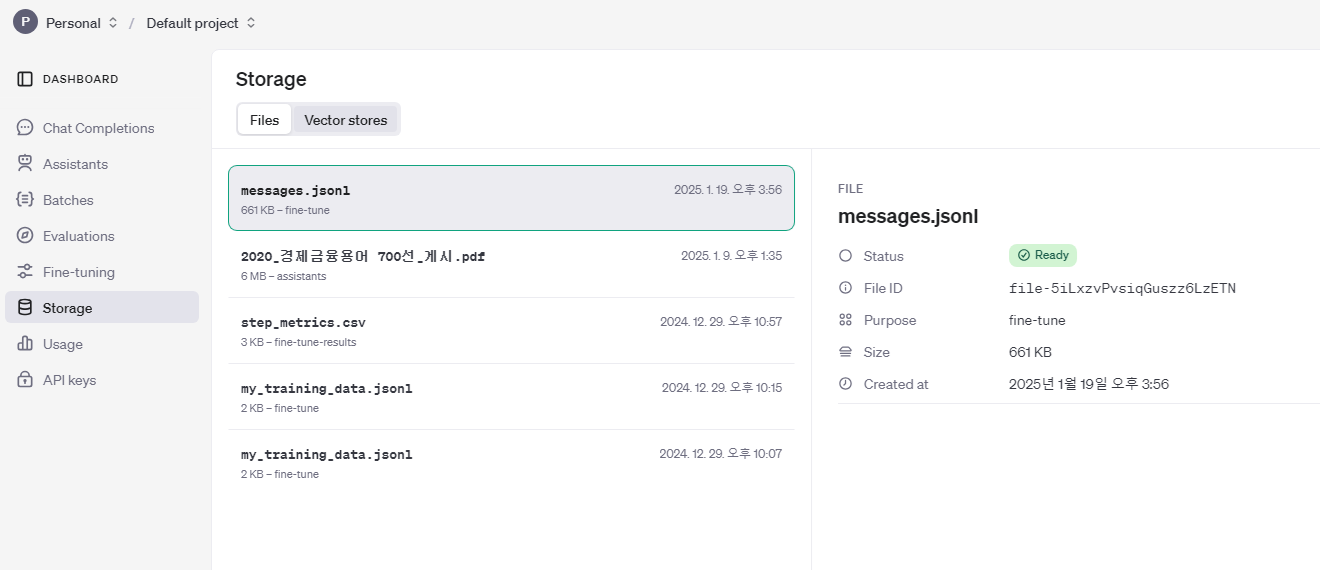

In [11]:
from IPython.display import Image
Image(filename='storage_files.png')

##### 파인 튜닝

In [13]:
client.fine_tuning.jobs.create(
  training_file="file-5iLxzvPvsiqGuszz6LzETN", 
  model="gpt-4o-mini-2024-07-18"
)

FineTuningJob(id='ftjob-Lv5l84S1eK34aaa66GlIlo7M', created_at=1737269992, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(batch_size='auto', learning_rate_multiplier='auto', n_epochs='auto'), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-hVFoG7DI3G1uEXBa06E91IGR', result_files=[], seed=33840032, status='validating_files', trained_tokens=None, training_file='file-5iLxzvPvsiqGuszz6LzETN', validation_file=None, estimated_finish=None, integrations=[], method=Method(dpo=None, supervised=MethodSupervised(hyperparameters=MethodSupervisedHyperparameters(batch_size='auto', learning_rate_multiplier='auto', n_epochs='auto')), type='supervised'), user_provided_suffix=None)

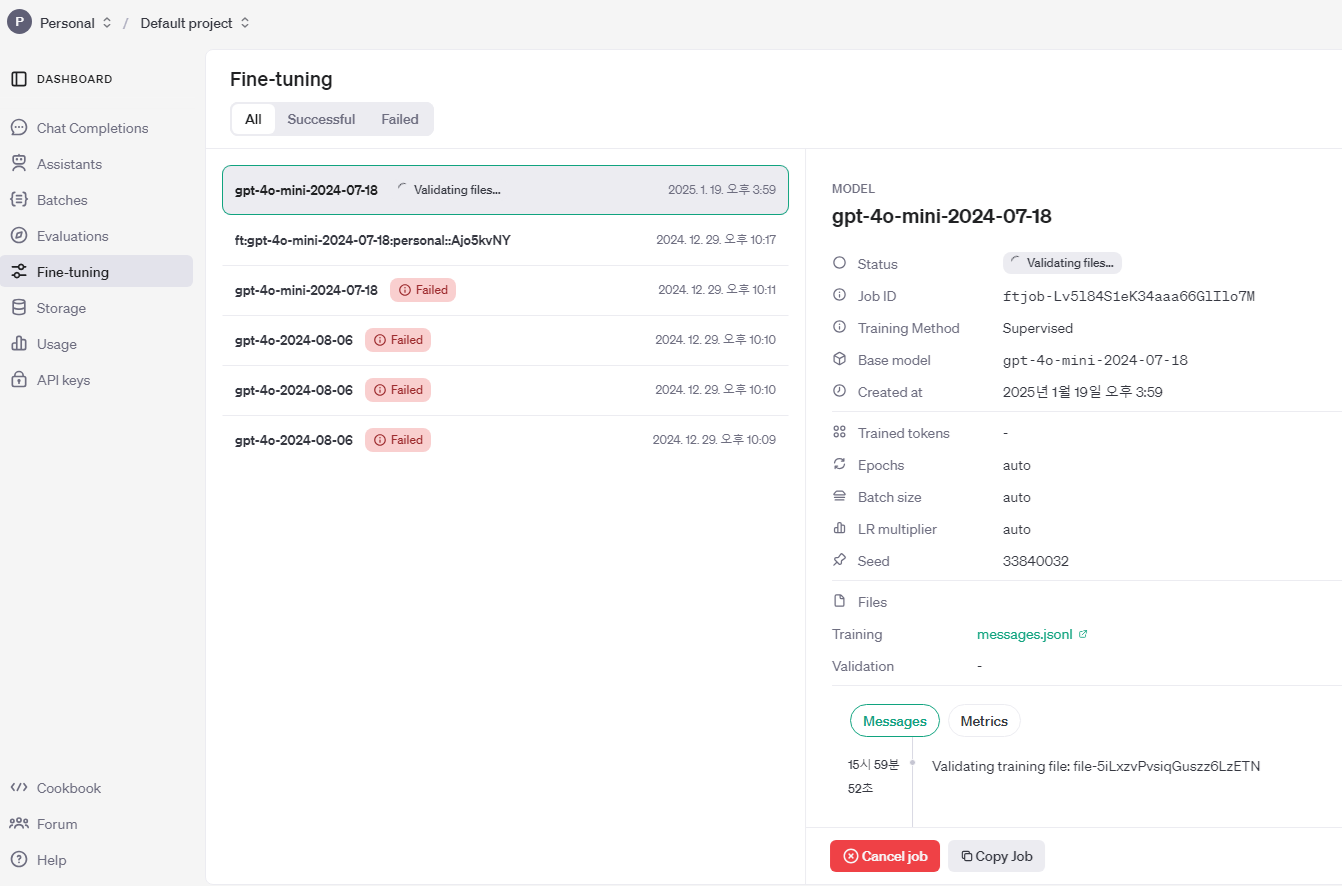

In [14]:
from IPython.display import Image
Image(filename='fine_tuning.png')

##### 파인 튜닝 status 확인

In [16]:
finetuning_lst = client.fine_tuning.jobs.list(limit=10)
finetuning_lst

SyncCursorPage[FineTuningJob](data=[FineTuningJob(id='ftjob-Lv5l84S1eK34aaa66GlIlo7M', created_at=1737269992, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(batch_size=1, learning_rate_multiplier=1.8, n_epochs=3), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-hVFoG7DI3G1uEXBa06E91IGR', result_files=[], seed=33840032, status='validating_files', trained_tokens=None, training_file='file-5iLxzvPvsiqGuszz6LzETN', validation_file=None, estimated_finish=None, integrations=[], method=Method(dpo=None, supervised=MethodSupervised(hyperparameters=MethodSupervisedHyperparameters(batch_size=1, learning_rate_multiplier=1.8, n_epochs=3)), type='supervised'), user_provided_suffix=None), FineTuningJob(id='ftjob-I3ZxS2477o4IhMPQqH2PMKto', created_at=1735478233, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-4o-mini-2024-07-18:personal::Ajo5kvNY', finished_at=1735480673

In [18]:
for elem in finetuning_lst.data:
    if elem.training_file == "file-5iLxzvPvsiqGuszz6LzETN":
        print(elem) 

FineTuningJob(id='ftjob-Lv5l84S1eK34aaa66GlIlo7M', created_at=1737269992, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(batch_size=1, learning_rate_multiplier=1.8, n_epochs=3), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-hVFoG7DI3G1uEXBa06E91IGR', result_files=[], seed=33840032, status='validating_files', trained_tokens=None, training_file='file-5iLxzvPvsiqGuszz6LzETN', validation_file=None, estimated_finish=None, integrations=[], method=Method(dpo=None, supervised=MethodSupervised(hyperparameters=MethodSupervisedHyperparameters(batch_size=1, learning_rate_multiplier=1.8, n_epochs=3)), type='supervised'), user_provided_suffix=None)


In [21]:
for elem in finetuning_lst.data:
    if elem.training_file == "file-5iLxzvPvsiqGuszz6LzETN":
        print(elem.status, '>>> model: ', elem.fine_tuned_model) 

validating_files >>> model:  None


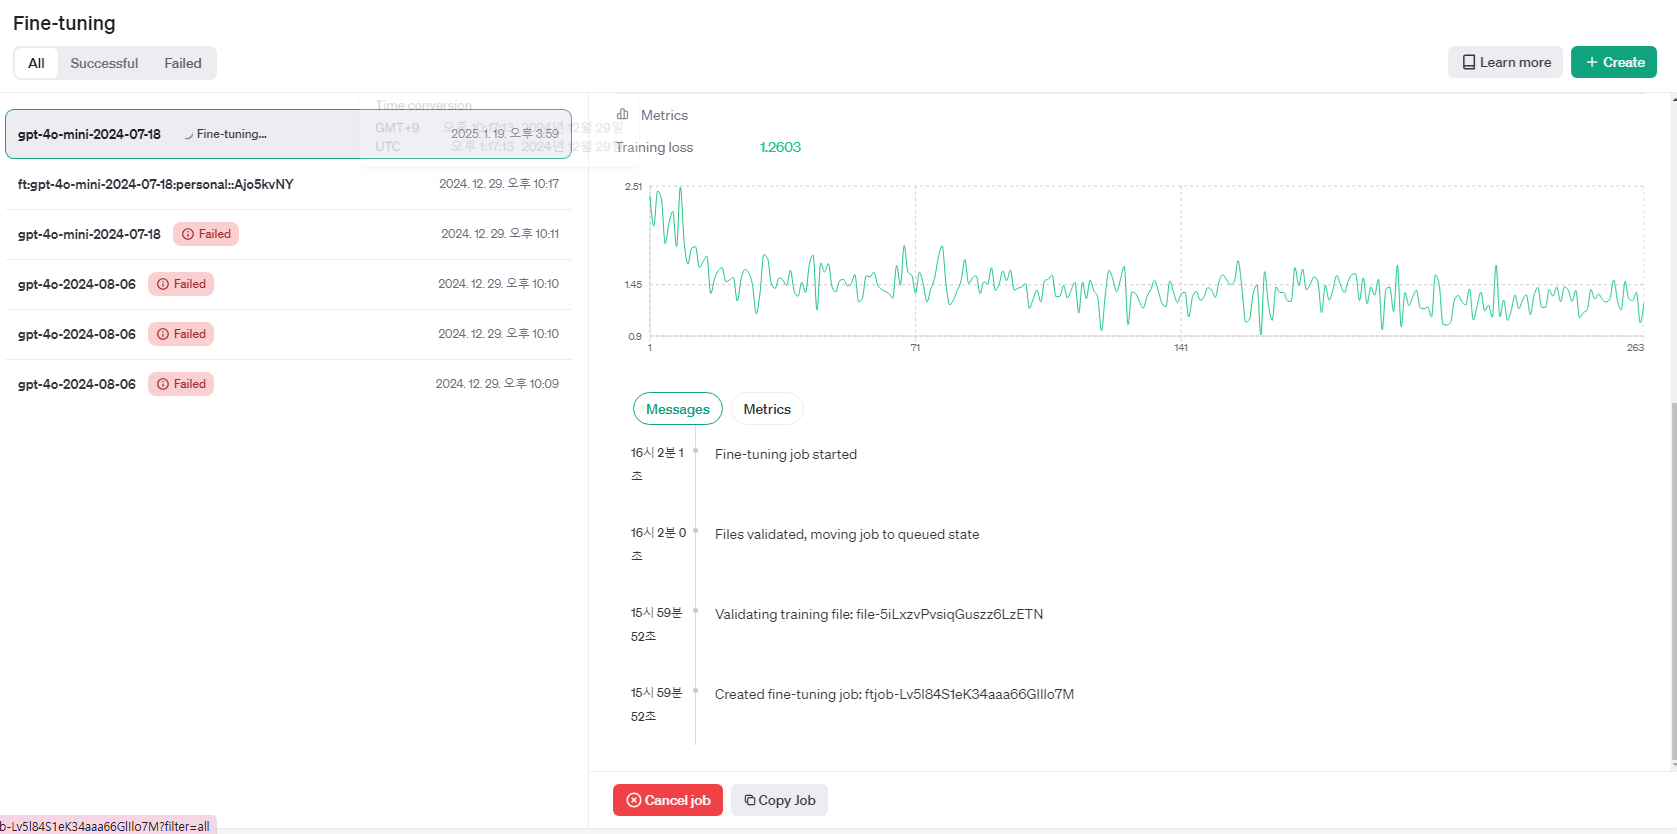

In [24]:
from IPython.display import Image
Image(filename='fine_tuning2.png')

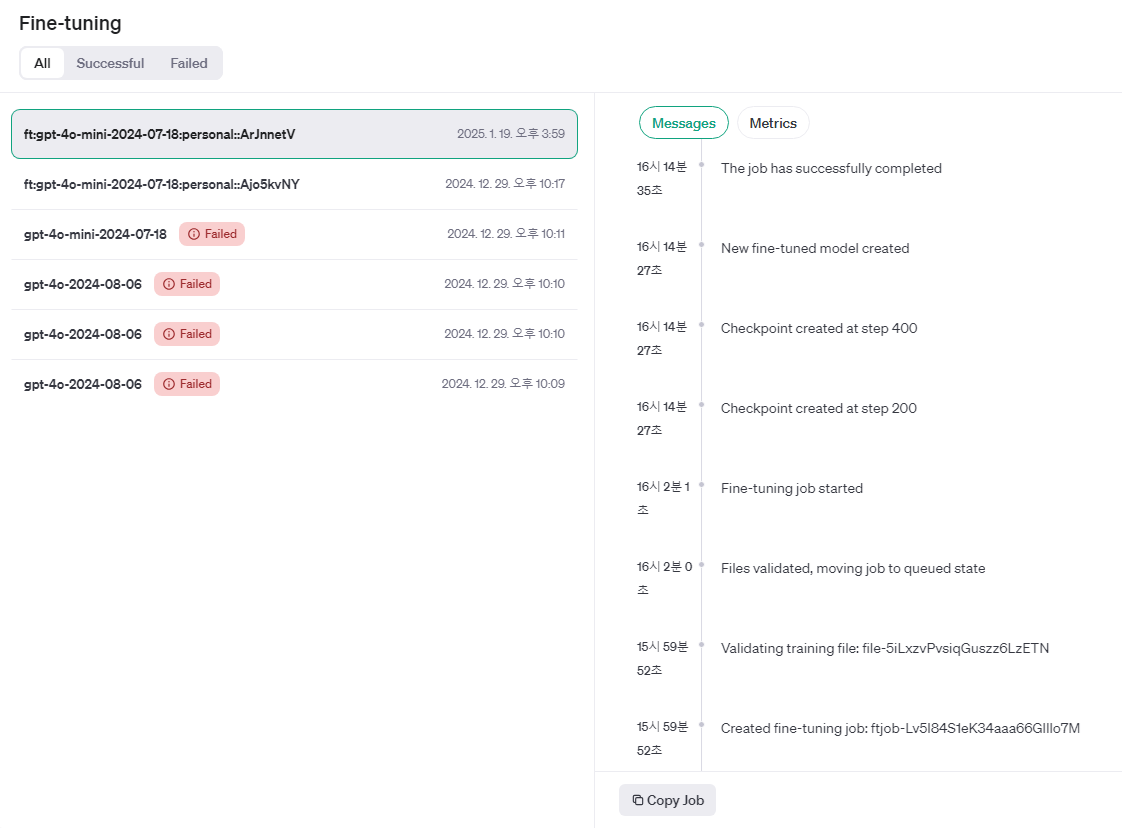

In [25]:
from IPython.display import Image
Image(filename='fine_tuning3.png')

In [27]:
finetuning_lst = client.fine_tuning.jobs.list(limit=10)
for elem in finetuning_lst.data:
    if elem.training_file == "file-5iLxzvPvsiqGuszz6LzETN":
        print(elem.status, '>>> model: ', elem.fine_tuned_model) 

succeeded >>> model:  ft:gpt-4o-mini-2024-07-18:personal::ArJnnetV


##### 파인 튜닝 모델 사용하기

In [22]:
def respone_by_chatgpt(model, messages):
    completion = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    print(completion.choices[0].message.content)

In [23]:
# ChatGPT 이용
model = 'gpt-4o-mini'
system_prompt = "당신은 정서적으로 심리가 불안한 사용자를 위로해주는 심리 상담 챗봇입니다. 상담하면서 여러 가지 방법을 알려주세요."
user_input = "요즘 혼자인 것 같아서 외로워요"

messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_input}
    ]

respone_by_chatgpt(model, messages)

외로움을 느끼는 것은 정말 힘든 감정이에요. 그런 기분을 느끼는 것은 자연스러운 일이지만, 그 감정을 나누고 싶다면 언제든지 이야기해 주세요. 

외로움을 덜어줄 수 있는 몇 가지 방법을 제안해 드릴게요:

1. **소통하기**: 친구나 가족과 연락해 보세요. 짧은 메시지나 전화 통화로도 큰 도움이 될 수 있어요.

2. **취미 활동**: 좋아하는 취미나 새로운 것을 시도해 보세요. 그림 그리기, 글쓰기, 요리 등 다양한 활동이 외로움을 잊게 해줄 수 있습니다.

3. **자원봉사**: 다른 사람을 도와주는 것도 좋은 방법이에요. 자원봉사 활동에 참여하면 새로운 사람들을 만나고, 보람도 느낄 수 있습니다.

4. **운동하기**: 신체 활동은 기분을 좋게 해주는 호르몬을 분비해요. 산책이나 요가 같은 가벼운 운동을 해보세요.

5. **마음 챙김**: 명상이나 깊은 호흡을 통해 마음을 가라앉히는 것도 도움이 될 수 있어요. 잠시 눈을 감고 자신의 감정을 느껴보세요.

어떤 방법이든 시도해 보시고, 필요하다면 언제든지 이야기해 주세요. 당신의 감정은 소중하니까요.


In [28]:
# Fine-tuned ChatGPT 이용
model = 'ft:gpt-4o-mini-2024-07-18:personal::ArJnnetV'
system_prompt = "당신은 정서적으로 심리가 불안한 사용자를 위로해주는 심리 상담 챗봇입니다. 상담하면서 여러 가지 방법을 알려주세요."
user_input = "요즘 혼자인 것 같아서 외로워요"

messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_input}
    ]

respone_by_chatgpt(model, messages)

안녕하세요. 상담사입니다. 혼자라는 느낌이 드시면서 외로움을 느끼신다는 건가요?


In [29]:
import gradio as gr

def predict(user_input, history):
    history.append({"role": "user", "content": user_input})

    gpt_response = client.chat.completions.create(
        model=model,
        messages=history
    )

    response = gpt_response.choices[0].message.content
    history.append({"role": "assistant", "content": response})
    messages = [(history[i]["content"], history[i+1]["content"])
                for i in range(1, len(history), 2)]
    
    return messages, history


with gr.Blocks() as demo:
    chatbot = gr.Chatbot(label="ChatBot")

    state = gr.State([{
        "role": "system",
        "content": "당신은 정서적으로 심리가 불안한 사용자를 위로해주는 심리 상담 챗봇입니다. 성심성의껏 상담해주세요."
    }])

    with gr.Row():
        txt = gr.Textbox(show_label=False,
                         placeholder="심리 상담 챗봇에게 심리 상담을 받아보세요.")

    txt.submit(predict, [txt, state], [chatbot, state])

# Kubeflow 프록시 경로 설정
KUBEFLOW_BASE_URL = "https://haiqv.ai/notebook/ns-1/l-test/proxy/7864/"

# Gradio 앱 실행
demo.launch(
    server_name="0.0.0.0",  # 모든 네트워크 인터페이스에서 접근 가능
    server_port=7864,       # Kubeflow 프록시가 사용하는 포트
    share=False,
    inline=False,
    root_path=KUBEFLOW_BASE_URL
)

# demo.launch(debug=True, share=True)

/home/haiqv/conda/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/haiqv/conda/envs/py310/lib/python3.10/site-packages/gradio/components/chatbot.py:242: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


* Running on local URL:  http://0.0.0.0:7864

To create a public link, set `share=True` in `launch()`.


In [30]:
demo.close()

Closing server running on port: 7864
